##Problem statement:
1. To build a CNN based model which can accurately detect melanoma.
2.Melanoma is a type of cancer that can be deadly if not detected early.
3. It accounts for 75% of skin cancer deaths.

### Data is read from  google drive

In [13]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### import all the required libraries

In [14]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [15]:


# Assuming 'path' is defined as in ipython-input-8-814ab07548b4
path = '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/'

# Defining the path for train and test images
# Use pathlib.Path to create Path objects
data_dir_train = pathlib.Path(path + "Train")
data_dir_test = pathlib.Path(path + "Test")

# Now you can use .glob()
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [3]:
list(data_dir_train.glob('*/*.jpg'))[0]

PosixPath('/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026765.jpg')

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(180, 180),
  batch_size=32)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [17]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(180, 180),
  batch_size=32)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [7]:
for image_batch, labels_batch in val_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(23, 180, 180, 3)
(23,)


In [18]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


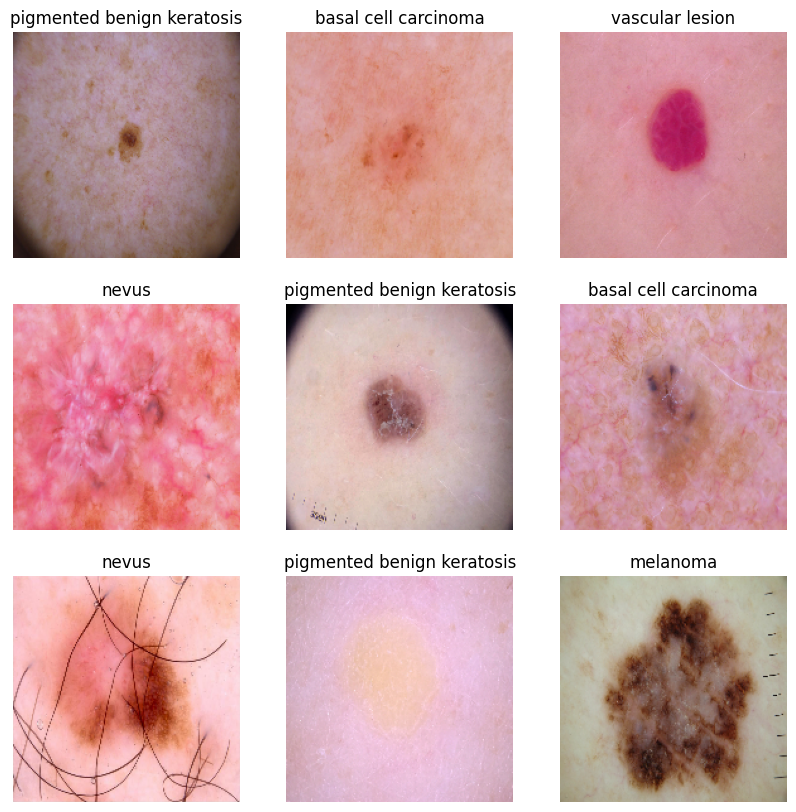

In [9]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

##normailize the data before modelling

In [19]:
train_ds = train_ds.map(lambda x, y: (x / 255, y))
val_ds = val_ds.map(lambda x, y: (x / 255, y))

In [20]:
epochs = 20
img_height = 180
img_width = 180
batch_size = 32

# MODEL  TRAINING

In [21]:
num_classes = 9

model = models.Sequential([
  layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         663,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 761,641 (2.91 MB)

 Trainable params: 761,641 (2.91 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 381s 7s/step - accuracy: 0.2374 - loss: 2.0142 - val_accuracy: 0.2609 - val_loss: 2.3382
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 313ms/step - accuracy: 0.3667 - loss: 1.7486 - val_accuracy: 0.2609 - val_loss: 2.4534
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 272ms/step - accuracy: 0.4343 - loss: 1.6094 - val_accuracy: 0.3043 - val_loss: 2.5360
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 281ms/step - accuracy: 0.4829 - loss: 1.4697 - val_accuracy: 0.3043 - val_loss: 2.4305
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 298ms/step - accuracy: 0.4913 - loss: 1.4252 - val_accuracy: 0.3043 - val_loss: 2.7035
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 275ms/step - accuracy: 0.5202 - loss: 1.3818 - val_accuracy: 0.3043 - val_loss: 2.4338
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 292ms/step - accuracy: 0.5173 - loss: 1.3331 - val_accuracy: 0.2609 - val_loss: 2.7484
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - accuracy: 0.5177 - loss: 1.3642 - val_accura

In [11]:
def plot_history(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()
  # You can also print the final accuracy and loss values:
  print("Final training accuracy:", history.history['accuracy'][-1])
  print("Final validation accuracy:", history.history['val_accuracy'][-1])
  print("Final training loss:", history.history['loss'][-1])
  print("Final validation loss:", history.history['val_loss'][-1])




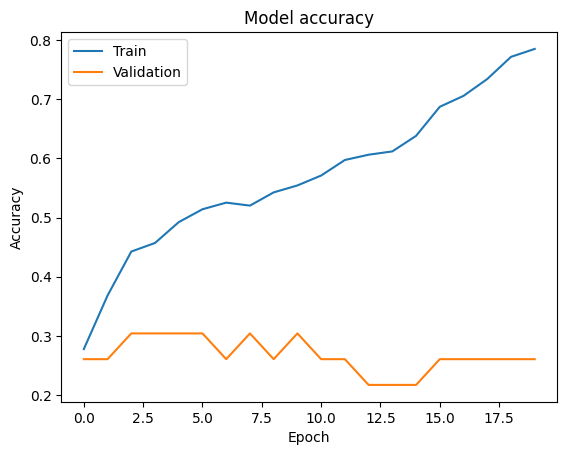

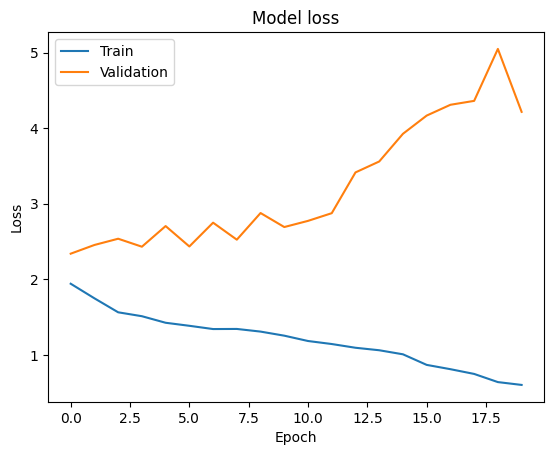

Final training accuracy: 0.7845982313156128
Final validation accuracy: 0.260869562625885
Final training loss: 0.6017006635665894
Final validation loss: 4.214599609375


In [23]:
plot_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


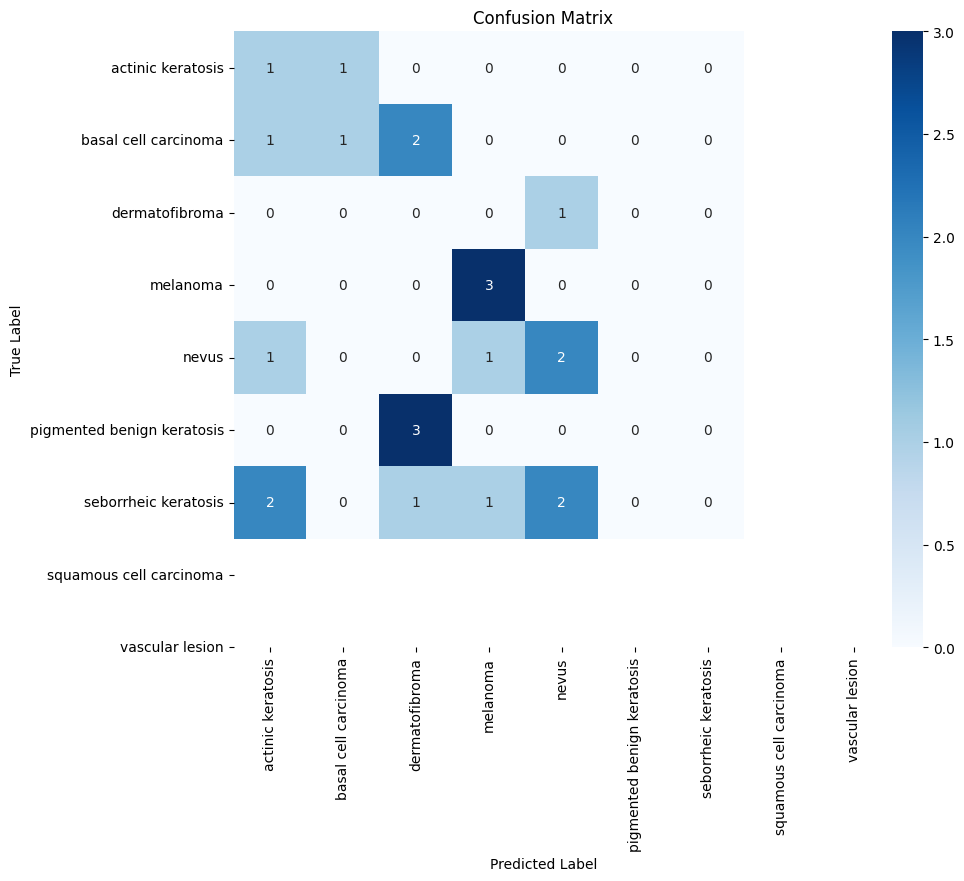

In [17]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for the validation set
y_pred = np.argmax(model.predict(val_ds), axis=-1)

# Get true labels for the validation set
y_true = []
for _, labels_batch in val_ds:
  y_true.extend(labels_batch.numpy())

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Model Analysis

Observation  from the current model
1. low accuracy
2. high loss
3. model underfit
4. Class imbalance

#Dropout

In [32]:
model2 = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [33]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 89, 89, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 44, 44, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 44, 44, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputs (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,022,537 (15.34 MB)

 Trainable params: 4,022,537 (15.34 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 286ms/step - accuracy: 0.7879 - loss: 0.5736 - val_accuracy: 0.2609 - val_loss: 5.4996
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 282ms/step - accuracy: 0.8491 - loss: 0.4353 - val_accuracy: 0.2174 - val_loss: 6.3402
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - accuracy: 0.8555 - loss: 0.4210 - val_accuracy: 0.3043 - val_loss: 6.6744
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - accuracy: 0.8189 - loss: 0.4580 - val_accuracy: 0.2609 - val_loss: 7.0993
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - accuracy: 0.8511 - loss: 0.4126 - val_accuracy: 0.2609 - val_loss: 6.2038
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - accuracy: 0.8740 - loss: 0.3299 - val_accuracy: 0.2609 - val_loss: 7.4029
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 322ms/step - accuracy: 0.8718 - loss: 0.3108 - val_accuracy: 0.2609 - val_loss: 6.6526
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 275ms/step - accuracy: 0.9124 - loss: 0.2528 - val_accu

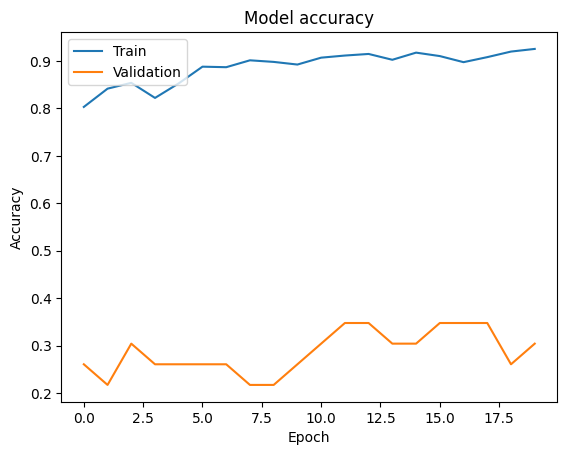

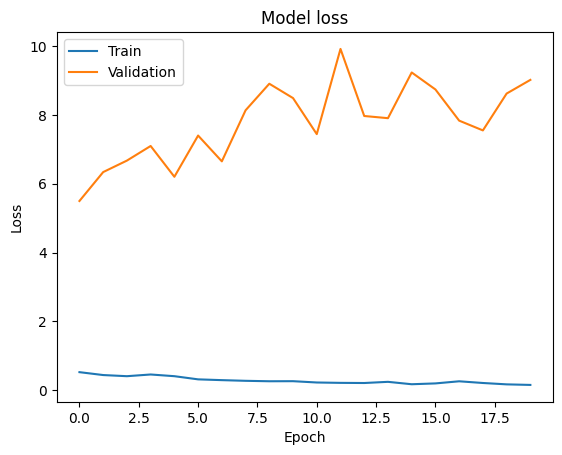

Final training accuracy: 0.9252232313156128
Final validation accuracy: 0.30434781312942505
Final training loss: 0.15026333928108215
Final validation loss: 9.021761894226074


In [36]:
plot_history(history)
